# LSTM Time Series - Stock Price Prediction
## Part 1 - Data Explanatory Analysis
This notebook focuses on examining the raw dataset containing daily historical prices of Google stocks. The goal is to identify a specific timeframe suitable for further analysis and prediction using LSTM.

> **INPUT**: The raw data file of all available stock prices of Google (Alphabet Inc.), as downloaded from its original source. <br/>
> **OUTPUT**: The extracted historical data of the targeted period for analysis, stored in an intermediary location for next steps.

### 1. INITIALIZATION

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. LOAD DATASET FILE

The dataset we are going to initially load and explore is the historical records of daily price details of Google (Alphabet Inc.) sourced from [Yahoo Finance](https://finance.yahoo.com/quote/GOOG).

At first, we load the complete dataset available spanning a period from 2004-08-19 up until the time of creating this script.

The main objective of loading the entire dataset is to choose a particular time frame for analysis.

In [9]:
# Prepare data file location and load the dataset
data_file_location = "../data/raw/"
# data_file_name = "btc_prices"
data_file_name = "btc_prices_daily_updated"

data_file_ext = "csv"

# Load data file
data = pd.read_csv(data_file_location + data_file_name + "." + data_file_ext)

In [3]:
# Check dataset head
data.head()

,Date,Open,High,Low,Close
0,11/29/2024,"94,825","98,729","94,825","97,416"
1,11/28/2024,"96,625","96,712","94,688","94,825"
2,11/27/2024,"90,981","97,366","90,784","96,626"
3,11/26/2024,"94,859","95,134","90,755","90,982"
4,11/25/2024,"96,884","98,966","94,491","94,856"


### 3. INITIAL DATA CLEANING

As we notice, the Date column is currently in a String format which requires conversion to proper Datetime format.

In [10]:
# Convert Date column to a valid Datetime format
data["Date"] = pd.to_datetime(data["Date"])
data['Close'] = data["Close"].str.replace(',', '').astype(float)
data['Open'] = data['Open'].str.replace(',', '').astype(float)
data['High'] = data['High'].str.replace(',', '').astype(float)
data['Low'] = data['Low'].str.replace(',', '').astype(float)
# data = data.drop(columns=['Change %', 'Vol.'])

### 4. EXPLORE DATASET

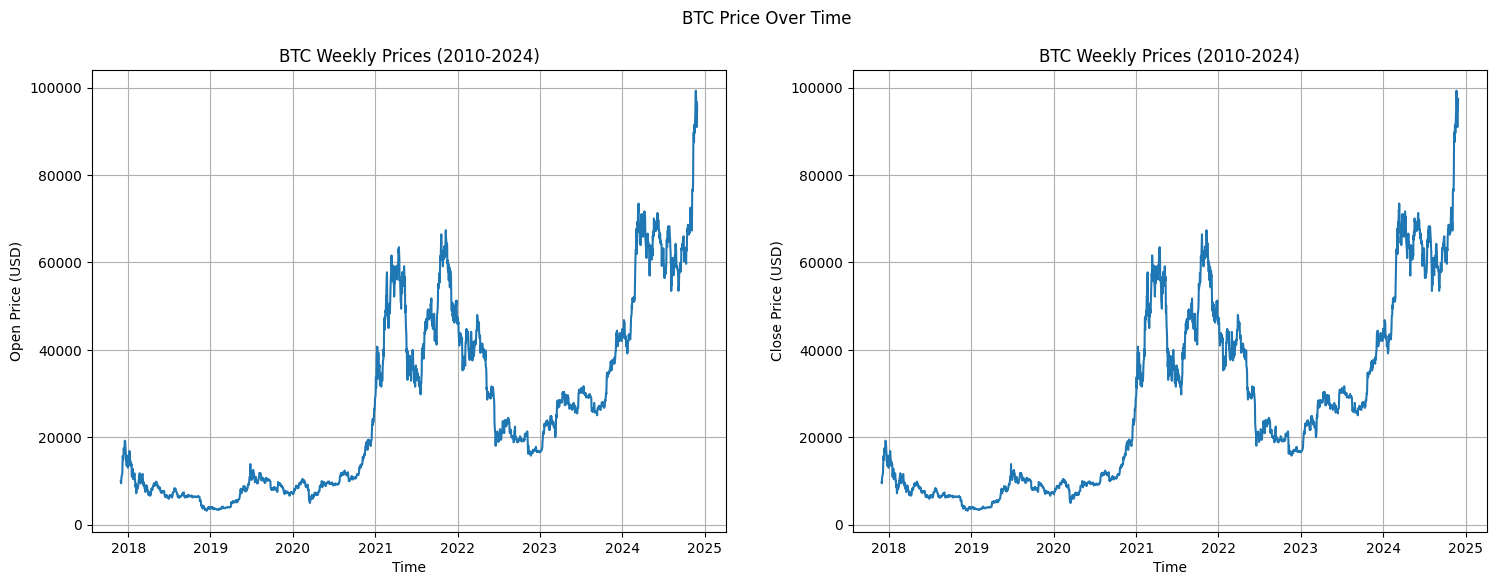

In [11]:
# Plot Open and Close price for the whole period
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.plot(data["Date"], data["Open"])
plt.xlabel("Time")
plt.ylabel("Open Price (USD)")
plt.title("BTC Weekly Prices (2010-2024)")
plt.grid()

plt.subplot(1,2,2)
plt.plot(data["Date"], data["Close"])
plt.xlabel("Time")
plt.ylabel("Close Price (USD)")
plt.title("BTC Weekly Prices (2010-2024)")
plt.grid()

plt.suptitle("BTC Price Over Time")
plt.show()

We shall focus on past 4 years

In [12]:
# Select stock price records for the last five years, starting from 2020
data_4years = data[data["Date"].dt.year >= 2020]

# Check filtered data shape
data_4years.shape

(1795, 5)

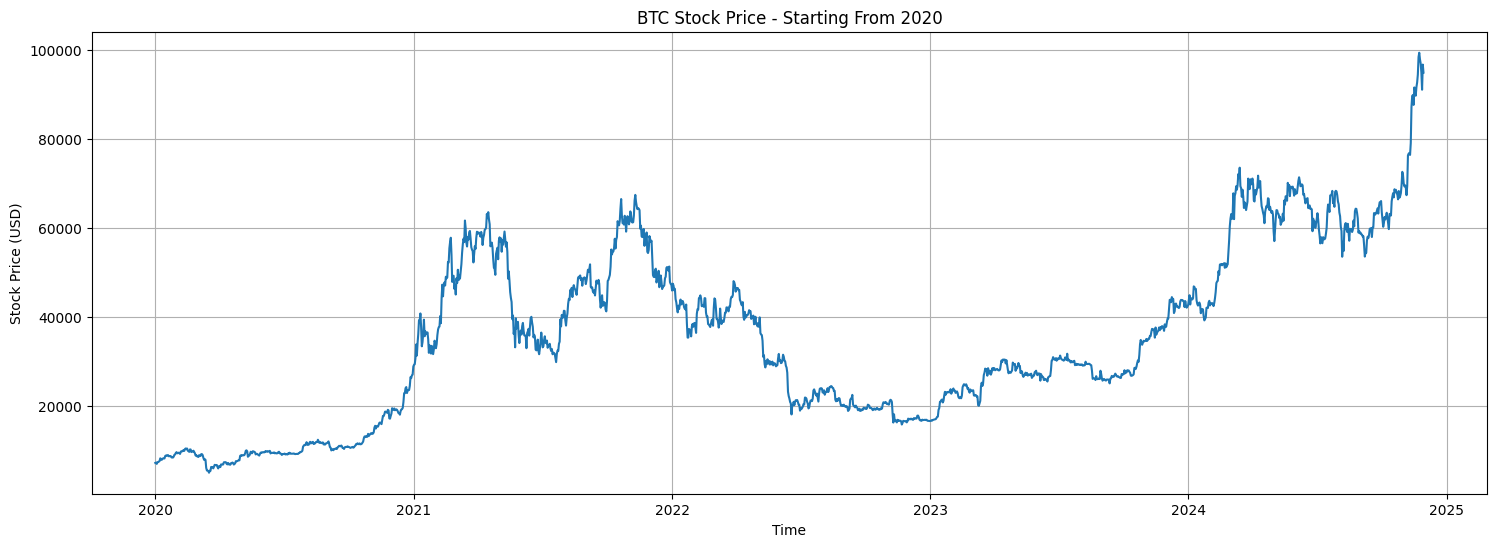

In [13]:
# Plot Open stock price performance in the last five years
plt.figure(figsize=(18,6))
plt.plot(data_4years["Date"], data_4years["Open"])
plt.xlabel("Time")
plt.ylabel("Stock Price (USD)")
plt.title("BTC Stock Price - Starting From 2020")
plt.grid()

The selected period seems to be more relevant for analysis, as it's more likely to drive the stock performance with the impact of other external factors.

### 5. STORE FILTERED DATASET

In [14]:
# Prepare data file location
data_file_location = "../data/interim/"
data_file_name = "btc_prices_recent_updated"
data_file_ext = "csv"

# Store dataset
data_4years.to_csv(data_file_location + data_file_name + "." + data_file_ext, index=None)